# HW1

### Faye(Yiyang)Xie

## 1 European Option

### (a) Find the price of the call option

* Firstly, review the code snippet of the **Black-Scholes** framework from class
  ```python
    # Import module
    import numpy as np
    from scipy.stats import norm
    
    # Function to give the value of a European call option
    def bs_call(S, K, T, r, sigma):
    
        # Calculate d_1 and d_2
        d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
        d_2 = d_1 - sigma * np.sqrt(T)
    
        # Calculate C
        C = S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)
    
        return C
    
    # Function to give the value of a European put option
    def bs_put(S, K, T, r, sigma):
    
        # Get the price of a call
        C = bs_call(S, K, T, r, sigma)
    
        # Use put-call parity
        P = C - S + K * np.exp(-r * T)
    
        return P
```

* The price of a European call option with a strike of \$95 can be calculated simply using the code block `bs_call`
* $\ S = \$100 , K = \$95 ,  T = 0.25 ,  r = 4\% , \sigma = 35\% $

In [1]:
# Import module
import numpy as np
from scipy.stats import norm
    
# Function to give the value of a European call option
def bs_call(S, K, T, r, sigma):
    
    # Calculate d_1 and d_2
    d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)
    
    # Calculate C
    C = S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)
    
    return C

# Calculate the result
Value_of_C1 = bs_call(100,95,0.25,0.04,0.35)
print (Value_of_C1)

10.147518856561298


* We have the value of the call option (rounded to 2 decimal places):
* $C = \$10.15$

### (b) Apply Newton’s method to find the volatility

* We have the call option price and strike price as follows:


In [2]:
import pandas as pd

df = pd.DataFrame({
    "Strike($)": ["Call($)"],
    "80": [21.73],
    "90": [13.72],
    "100": [8.04],
    "110": [4.61],
    "120": [2.80]
})


pd.options.display.float_format = '{:.2f}'.format

print(df.to_string(index=False))

Strike($)    80    90  100  110  120
  Call($) 21.73 13.72 8.04 4.61 2.80


* To use Newton's method, we have to find the derivative of the call price $C$ to $\sigma$ :
$$
C' = \frac{\partial C}{\partial \sigma} = S \cdot \frac{\partial \phi (d_1)}{\partial \sigma} - Ke^{-rT} \cdot \frac{\partial \phi (d_2)}{\partial \sigma}
$$

* According to the chain rule, we have:
$$
\frac{\partial \phi (d_1)}{\partial \sigma} = \phi' (d_1)\cdot \frac{\partial d_1}{\partial \sigma},\quad
\frac{\partial \phi (d_2)}{\partial \sigma} = \phi' (d_2)\cdot \frac{\partial d_2}{\partial \sigma}
$$

* Where $ \phi (x) $ is the cdf of the **Standard Normal Distribution** , and  $ \phi' (x) $ is the pdf of **Standard Normal Distribution**

* For $\frac{\partial d_1}{\partial \sigma}$, we have:
  $$
    d_1 = \frac{\ln(S/K) + rT}{\sigma \sqrt{T}} + {\frac{1}{2}\sigma \sqrt{T}}
    $$

* Therefore:
$$
\frac{\partial d_1}{\partial \sigma} = -\frac{\ln(S/K) + rT}{\sigma^2 \sqrt{T}} + \frac{1}{2}\sqrt{T}
$$

* For the left part of the equation, using the definition of $d_1$:
$$
\ln(S/K) + r(T-t) = d_1 \sigma \sqrt{T} - \frac{1}{2}\sigma^2 (T)
$$

* We have :
$$
\frac{\partial d_1}{\partial \sigma} = -\frac{d_1}{\sigma} + \sqrt{T}
$$

* As $d_2 = d_1 - \sigma \sqrt{T}$：
  $$
  \frac{\partial d_2}{\partial \sigma} = \frac{\partial d_1}{\partial \sigma} - \sqrt{T} = -\frac{d_1}{\sigma} 
  $$

* Therefore, $C'$ follows:
  $$
  C' =  S \phi' (d_1)\cdot \left(-\frac{d_1}{\sigma} + \sqrt{T}\right) - Ke^{-rT} \cdot \phi'(d_2) \left(-\frac{d_1}{\sigma}\right)
  $$

* Finding that
  $$
  \phi'(d_2) = \phi' (d_1)\cdot e^{d_1\sigma\sqrt{T}}\cdot e^{-\frac{\sigma^2 T}{2}}
  $$

* Using the definition of $d_1$:
 $$
  e^{d_1 \sigma \sqrt{T}} = e^{\ln(S/K) + rT + \frac{1}{2}\sigma^2 T} = \frac{S}{K} \cdot e^{r} \cdot e^{\frac{\sigma^2 T}{2}}
 $$

* Thus:
  $$
  \begin{split}
  \phi'(d_2) &= \phi' (d_1)\cdot \frac{S}{K} \cdot e^{r} \cdot e^{\frac{\sigma^2 T}{2}}\cdot e^{-\frac{\sigma^2 T}{2}} = \phi' (d_1)\cdot \frac{S}{K} \cdot e^{r} \\
  C' &= S \sqrt{T} \cdot \phi'(d_1)
  \end{split}
  $$

* Create the following function to calculate $C'$ and $\sigma$:

In [3]:
# Import module
import numpy as np
from scipy.stats import norm
    
# Function to give the value of a European call option
def bs_call(S, K, T, r, sigma):
    
    # Calculate d_1 and d_2
    d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)
    
    # Calculate C
    C = S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)
    
    return C
    
# Function to calculate the derivative of C
def c_deriv(S, K, T, r, sigma):

    # Calculate d_1
    d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    
    return S * np.sqrt(T) * norm.pdf(d_1)
    
#Function to calculate sigma using the Newton method:
def newton_method(S, K, T, r, C0,tol = 1e-6, max_iter = 100):

    # Initialize sigma
    sigma = 0.35

    # Iteration process
    for _ in range(max_iter):
        C = bs_call(S, K, T, r, sigma)
        C_deriv = c_deriv(S, K, T, r, sigma)
        diff = C - C0 
        
        # Newton Method
        sigma -= diff / C_deriv
        
        if abs(diff) < tol:
            return sigma
    raise ValueError('Result not converged')

In [4]:
# Calculate Result

# Define known values
S = 100
T = 0.25
r = 0.04
strikes = [80, 90, 100, 110, 120]
calls = [21.73, 13.72, 8.04, 4.61, 2.80]

for K, C0 in zip(strikes, calls):
    
    sigma = newton_method(S, K, T, r, C0)
    
    print (sigma)

0.38470875751615113
0.36979335917595957
0.38006242351963504
0.3999939418414615
0.4299983067455264


In [5]:
import pandas as pd

df = pd.DataFrame({
    "Strike($)": ["Call($)","sigma(%)"],
    "80": [21.73,38.471],
    "90": [13.72,36.979],
    "100": [8.04,38.006],
    "110": [4.61,40.000],
    "120": [2.80,43.000]
})

pd.options.display.float_format = '{:.3f}'.format

print(df.to_string(index=False))

Strike($)     80     90    100    110    120
  Call($) 21.730 13.720  8.040  4.610  2.800
 sigma(%) 38.471 36.979 38.006 40.000 43.000


### (c) Use root scalar in scipy.optimize to find the volatility

In [6]:
# Import module
import numpy as np
from scipy.stats import norm
from scipy.optimize import root_scalar
    
# Function to give the value of a European call option
def bs_call(S, K, T, r, sigma):
    
    # Calculate d_1 and d_2
    d_1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)
    
    # Calculate C
    C = S * norm.cdf(d_1) - K * np.exp(-r * T) * norm.cdf(d_2)
    
    return C

# Function to calculate sigma using the root_scalar method:
def root_scalar_method(S, K, T, r, C0):

    # Define the function of sigma
    def f(sigma):
        return bs_call(S, K, T, r, sigma) - C0
    sigma = root_scalar(f,bracket=[0.1, 500], method='brentq', xtol=1e-6)
    
    # Return result
    if sigma.converged:
        return sigma.root
    else:
        raise ValueError('Result not converged')

In [7]:
# Calculate Result

# Define known values
S = 100
T = 0.25
r = 0.04
strikes = [80, 90, 100, 110, 120]
calls = [21.73, 13.72, 8.04, 4.61, 2.80]

for K, C0 in zip(strikes, calls):
    
    sigma = root_scalar_method(S, K, T, r, C0)
    
    print (sigma)

0.3847088247594961
0.3697933592840492
0.38006242408238017
0.39999404188027554
0.42999829134311257


In [8]:
import pandas as pd

df = pd.DataFrame({
    "Strike($)": ["Call($)","sigma(%)"],
    "80": [21.73,38.471],
    "90": [13.72,36.979],
    "100": [8.04,38.006],
    "110": [4.61,40.000],
    "120": [2.80,43.000]
})

pd.options.display.float_format = '{:.3f}'.format

print(df.to_string(index=False))

Strike($)     80     90    100    110    120
  Call($) 21.730 13.720  8.040  4.610  2.800
 sigma(%) 38.471 36.979 38.006 40.000 43.000


* Perfectly matches what we've got in (b)

### (d) Plot the implied volatility found

* Use mathplotlib to plot the result, the code is shown as follows:

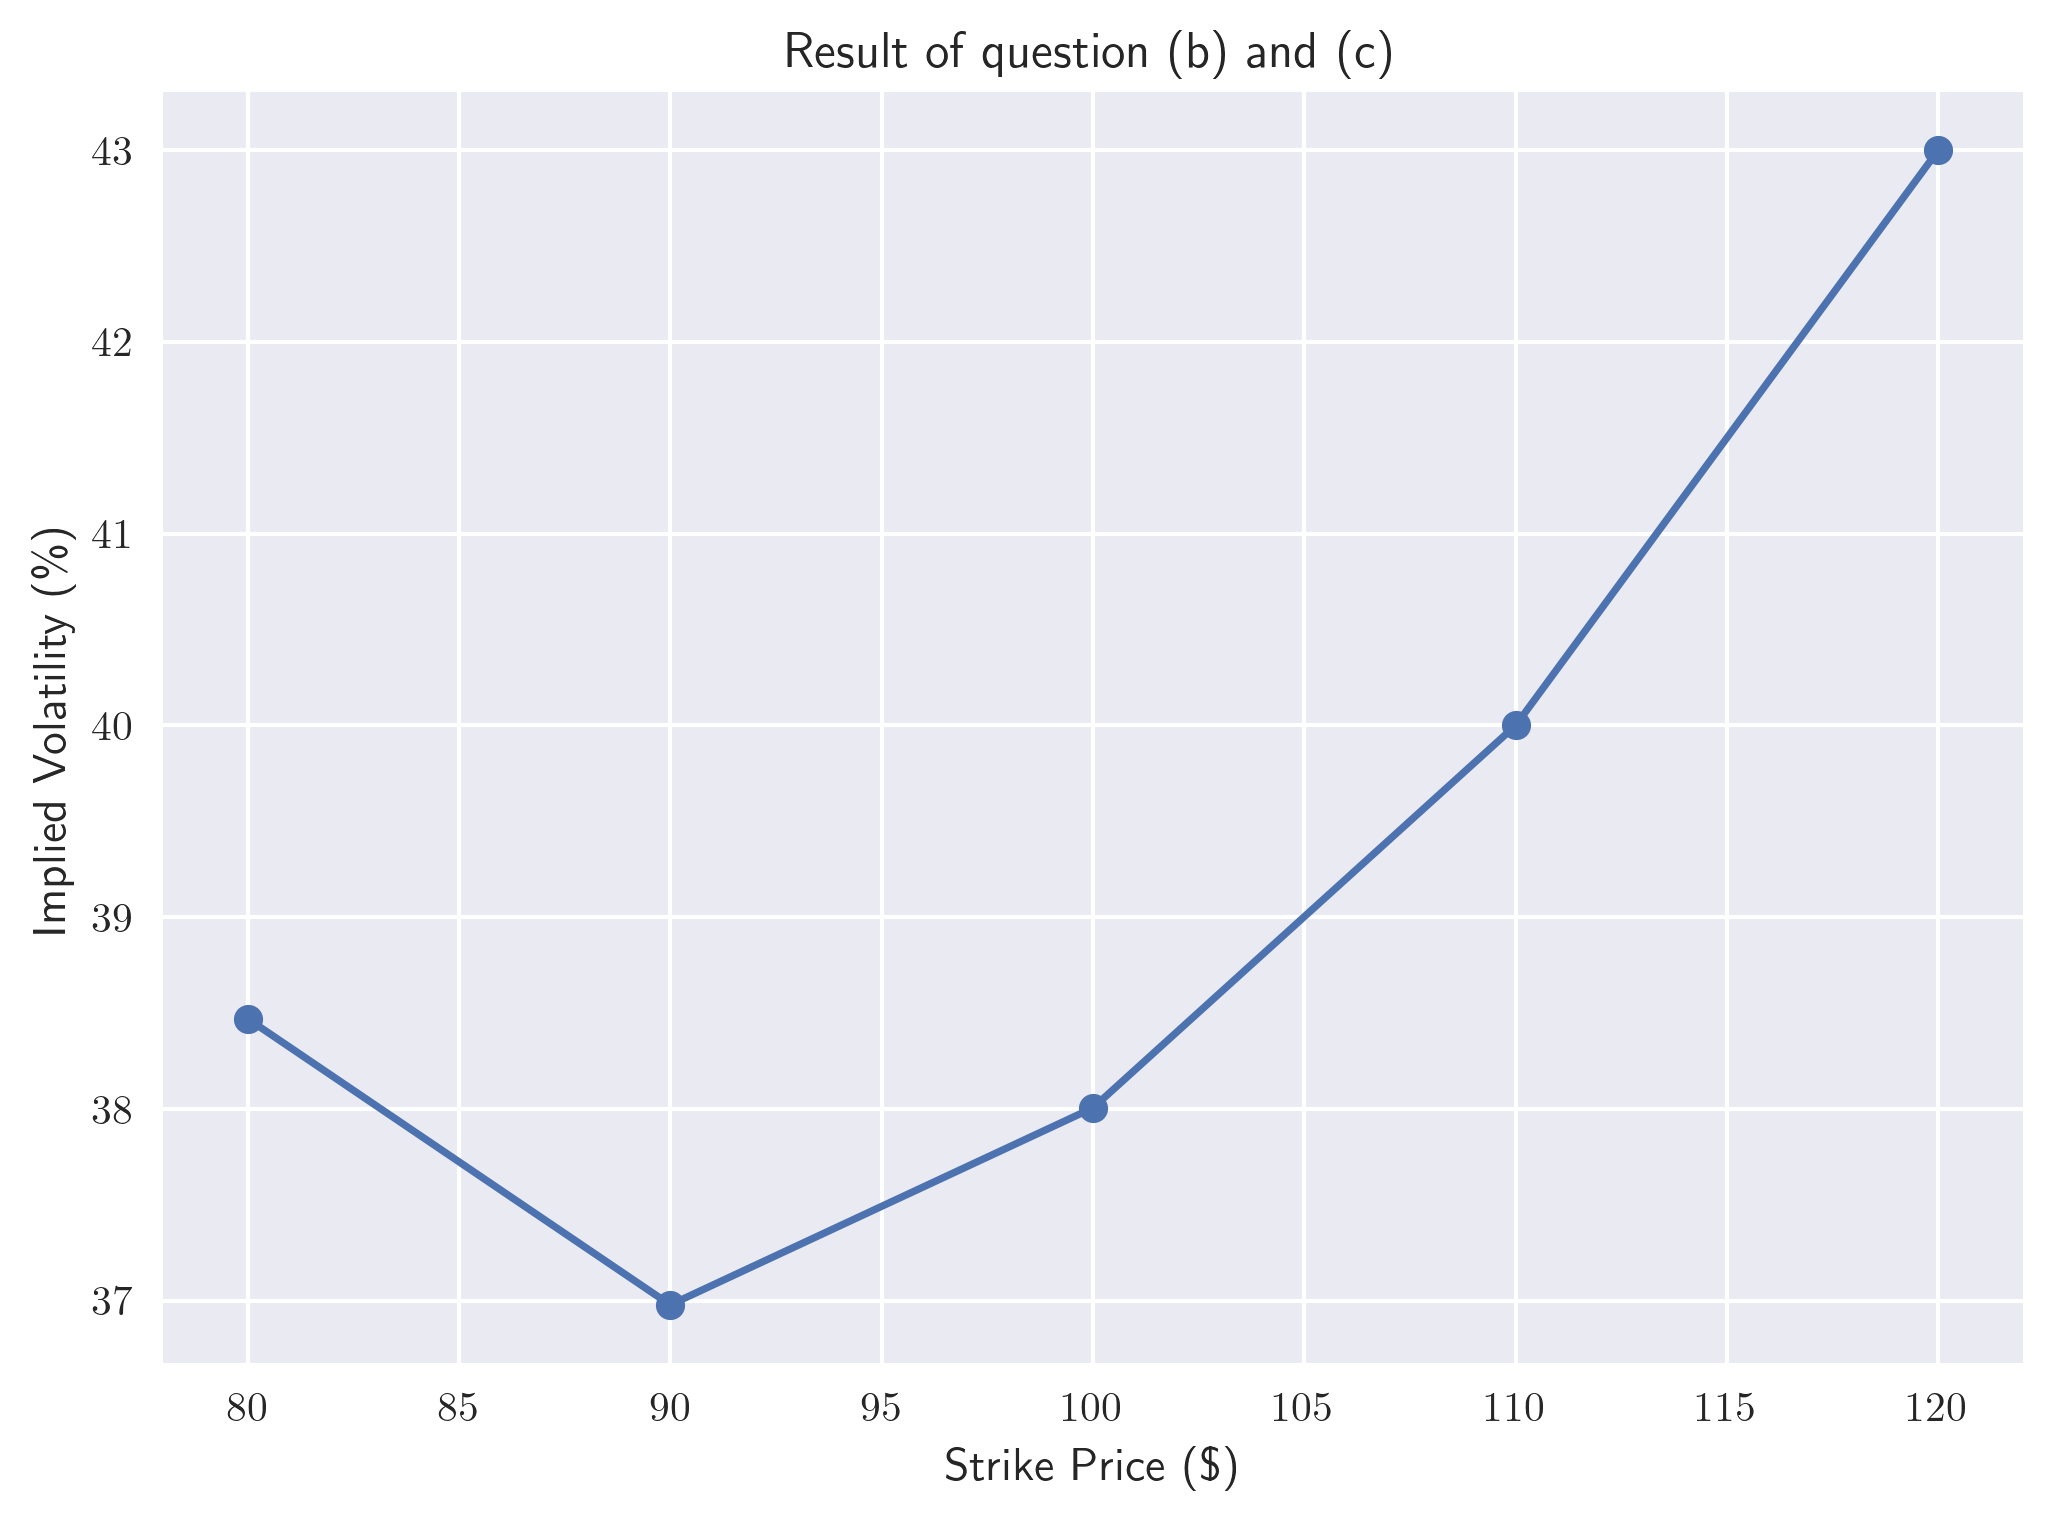

In [9]:
# Import module
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define strikes and sigmas
strikes = [80, 90, 100, 110, 120]
sigmas = [38.471, 36.979, 38.006, 40.000, 43.000]

plt.plot(strikes, sigmas,'-o')
plt.xlabel('Strike Price (\\$)')
plt.ylabel('Implied Volatility (\\%)')
plt.title('Result of question (b) and (c)')
plt.grid(True)
plt.show()

## 2 Estimate the area under $y = e^{-\sqrt{x}}$

### (a) Uniform partition

* To find the height of each rec, review the code given in class, which shows:
```python
    # Define Riemann sum
    def riemann_sum(f, P, pts):
        
        # Sort values
        P = np.sort(P)
    
        # Calculate Delta x
        dx_vals = np.diff(P) 
    
        # Define T
        if pts == 'left':
    
            # Skips the last value
            T = P[:-1]
            
        elif pts == 'right':
    
            # Skips the first value
            T = P[1:]
        elif pts == 'mid':
    
            # Average of left and right endpoint values
            T = (P[:-1] + P[1:])/2
            
        else:
            raise Exception('Currently only left, right, and midpoints are supported!')
            
        # Get area of rectangles; assumes f is vectorized
        rectangle_areas = f(T) * dx_vals
        
        # Return sum
        return np.sum(rectangle_areas)
```

* Where we can easily find that f(T) is the height of each rectangle

* Therefore, we can easily get the height base on the former code:

In [10]:
# Import module
import numpy as np

# Define Rectangle Height
def rec_height(f, P, pts):
    # Sort values
    P = np.sort(P)
    
    # Define T
    if pts == 'left':
    
        # Skips the last value
        T = P[:-1]
            
    elif pts == 'right':
    
        # Skips the first value
         T = P[1:]
        
    elif pts == 'mid':
    
        # Average of left and right endpoint values
        T = (P[:-1] + P[1:])/2
            
    else:
        raise Exception('Currently only left, right, and midpoints are supported!')
            
    # Get the height of rectangles; assumes f is vectorized
    rectangle_heights = f(T)
        
    # Return height
    return rectangle_heights

* Then we introduce the given value to the code given in class:
``` python
# Import pandas
import pandas as pd

# Define function
f = lambda x: np.e**(-x**2/2)

# Define the n-values
n_vals = [10, 50, 100, 500, 1000]

# Define list to hold values
results = pd.DataFrame(index = n_vals, columns = ['left', 'mid', 'right'])

# Loop over values
for n in n_vals:
    
    # We can use np.linspace for a uniform partition
    partition = np.linspace(0, 10, n + 1)
    
    # Get left endpoint results
    results.loc[n, 'left'] = riemann_sum(f, partition, 'left')
    
    # Get midpoint results
    results.loc[n, 'mid'] = riemann_sum(f, partition, 'mid') 
 
    # Get right endpoint results
    results.loc[n, 'right'] = riemann_sum(f, partition, 'right') 
```

In [11]:
# Import pandas
import pandas as pd

# Define function
f = lambda x: np.exp(-np.sqrt(x))

# Define the n-values
n_vals = [10, 25, 50, 75, 100]

# Define list to hold values
uniform_left = pd.DataFrame(index=range(100), columns=n_vals)
uniform_mid = pd.DataFrame(index=range(100), columns=n_vals)
uniform_right = pd.DataFrame(index=range(100), columns=n_vals)

# Loop over values
for n in n_vals:
    
    # We can use np.linspace for a uniform partition
    partition = np.linspace(1, 100, n + 1)
    
    # Get left endpoint results
    left_heights = rec_height(f, partition, 'left')
    uniform_left[n] = pd.Series(left_heights)
    
    # Get midpoint results
    mid_heights = rec_height(f, partition, 'mid') 
    uniform_mid[n] = pd.Series(mid_heights)
    # Get right endpoint results
    right_heights = rec_height(f, partition, 'right')
    uniform_right[n] = pd.Series(right_heights)


# Display the first few rows
print("Left Endpoint Heights:")
print(uniform_left.head())
print("\nMidpoint Heights:")
print(uniform_mid.head())
print("\nRight Endpoint Heights:")
print(uniform_right.head())

Left Endpoint Heights:
    10    25    50    75    100
0 0.368 0.368 0.368 0.368 0.368
1 0.037 0.108 0.178 0.218 0.244
2 0.010 0.050 0.108 0.148 0.178
3 0.004 0.028 0.072 0.108 0.136
4 0.002 0.017 0.050 0.082 0.108

Midpoint Heights:
    10    25    50    75    100
0 0.087 0.178 0.244 0.276 0.294
1 0.019 0.072 0.136 0.178 0.207
2 0.006 0.037 0.087 0.126 0.155
3 0.003 0.021 0.060 0.093 0.121
4 0.001 0.013 0.043 0.072 0.097

Right Endpoint Heights:
    10    25    50    75    100
0 0.037 0.108 0.178 0.218 0.244
1 0.010 0.050 0.108 0.148 0.178
2 0.004 0.028 0.072 0.108 0.136
3 0.002 0.017 0.050 0.082 0.108
4 0.001 0.010 0.037 0.063 0.087


### (b) Non-Uniform partition

* It's simlilar as (a), we only have to change the partition rule:

In [12]:
# Import pandas
import pandas as pd

# Define function
f = lambda x: np.exp(-np.sqrt(x))

# Define the n-values
n_vals = [10, 25, 50, 75, 100]

# Define list to hold values
nonuniform_left = pd.DataFrame(index=range(100), columns=n_vals)
nonuniform_mid = pd.DataFrame(index=range(100), columns=n_vals)
nonuniform_right = pd.DataFrame(index=range(100), columns=n_vals)

# Loop over values
for n in n_vals:
    
    # Recognize that the exponents are uniform
    exponents = np.linspace(0, 1, n+1)
    partition = 100 ** exponents
    
    # Get left endpoint results
    left_heights = rec_height(f, partition, 'left')
    nonuniform_left[n] = pd.Series(left_heights)
    
    # Get midpoint results
    mid_heights = rec_height(f, partition, 'mid') 
    nonuniform_mid[n] = pd.Series(mid_heights)
    
    # Get right endpoint results
    right_heights = rec_height(f, partition, 'right')
    nonuniform_right[n] = pd.Series(right_heights)


# Display the first few rows
print("Left Endpoint Heights:")
print(nonuniform_left.head())
print("\nMidpoint Heights:")
print(nonuniform_mid.head())
print("\nRight Endpoint Heights:")
print(nonuniform_right.head())

Left Endpoint Heights:
    10    25    50    75    100
0 0.368 0.368 0.368 0.368 0.368
1 0.284 0.334 0.351 0.357 0.359
2 0.205 0.301 0.334 0.345 0.351
3 0.136 0.268 0.317 0.334 0.342
4 0.081 0.236 0.301 0.323 0.334

Midpoint Heights:
    10    25    50    75    100
0 0.321 0.350 0.359 0.362 0.364
1 0.239 0.316 0.342 0.351 0.355
2 0.165 0.283 0.325 0.340 0.347
3 0.103 0.251 0.309 0.328 0.338
4 0.058 0.219 0.292 0.317 0.330

Right Endpoint Heights:
    10    25    50    75    100
0 0.284 0.334 0.351 0.357 0.359
1 0.205 0.301 0.334 0.345 0.351
2 0.136 0.268 0.317 0.334 0.342
3 0.081 0.236 0.301 0.323 0.334
4 0.042 0.205 0.284 0.312 0.326


### (c) Use analytic techniques to find the exact area

* It's difficult to find the derivative of $e^{-\sqrt{x}}$, but we can keep in mind that the derivative of $e^{ax}$ equals $ae^{x}$

* Therefore, let $u = \sqrt{x}$, then\
  $\,dx = \,du^2 = 2u\,du$ ,\
  $\int_{1}^{100}e^{-\sqrt{x}}\,dx = 2\int_{1}^{10}e^{-u}\,du$

* Using integration by parts, we have:

$$
\begin{align}
2\int_{1}^{10}e^{-u}\,du 
&= 2\left(-ue^{-u}\bigg\vert_{1}^{10} - \int_{1}^{10}-e^{-u}\,du\right)\\
&= 2\left(-ue^{-u}\bigg\vert_{1}^{10} + \int_{1}^{10}e^{-u}\,du\right)\\
&= 2\left(-ue^{-u}\bigg\vert_{1}^{10} - e^{-u}\bigg\vert_{1}^{10}\right)\\
&= -2e^{-u}\left(u + 1\right)\bigg\vert_{1}^{10} \\
&= \frac{4}{e} - \frac{22}{e^{10}}
\end{align}
$$

* Use python to calculate the accurate result:

In [13]:
# Import module
import numpy as np

result = 4 * np.exp(-1) - 22 * np.exp(-10)

print(result)

1.4705189662309948


 Thus $\int_{1}^{100}e^{-\sqrt{x}} = 1.4705$

### (d) Graph the results 

<Figure size 3000x4500 with 0 Axes>

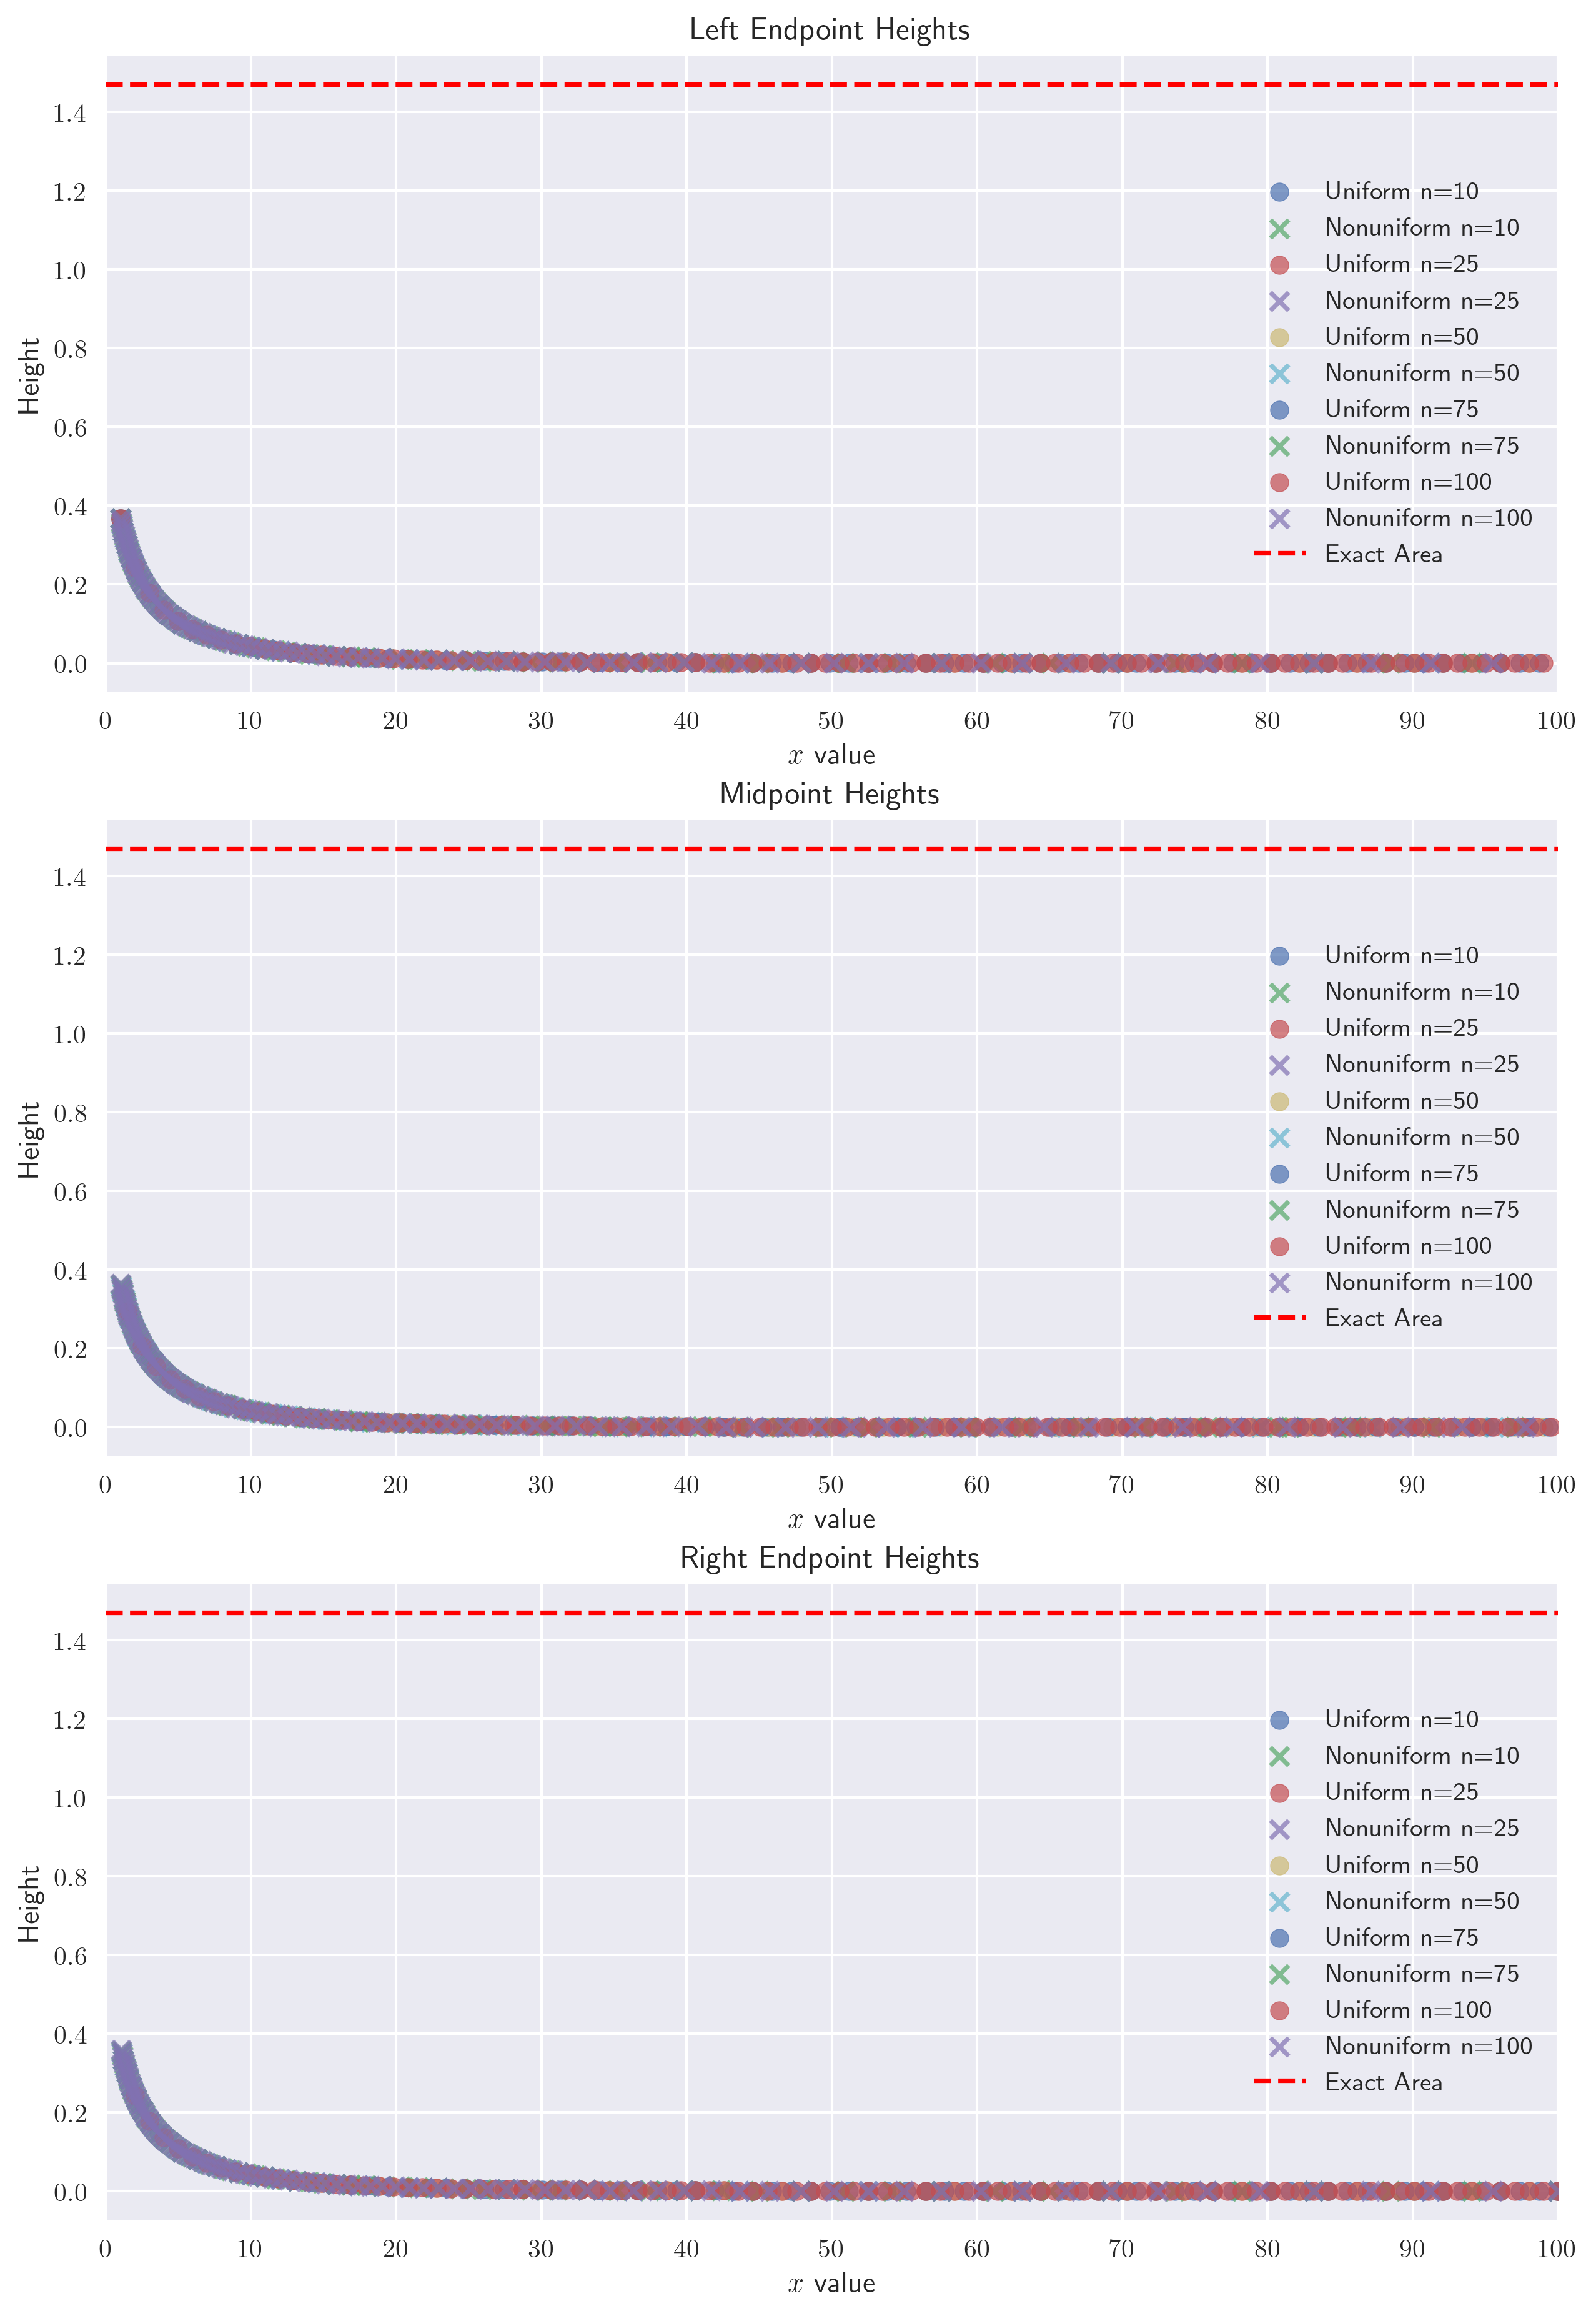

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set figure size
plt.figure(figsize=(10, 15))
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define subplot function
def subplot_height(n, pts, ax, exact_area, uniform_data, nonuniform_data):
    # Set titles
    titles = {'left': 'Left Endpoint Heights', 
              'mid': 'Midpoint Heights', 
              'right': 'Right Endpoint Heights'}
    ax.set_title(titles[pts])
    ax.set_xlabel('$x$ value')
    ax.set_ylabel('Height')
    ax.set_xlim(1, 100)
    ax.set_xticks(np.arange(0, 101, 10))
    
    
    for n_val in n:
        # Uniform
        uniform_x = np.linspace(1, 100, n_val+1)
        if pts == 'left':
            x = uniform_x[:-1]
        elif pts == 'right':
            x = uniform_x[1:]
        else:  
            x = (uniform_x[:-1] + uniform_x[1:]) / 2
        
        y = uniform_data[n_val].dropna()
        ax.scatter(x[:len(y)], y, label=f'Uniform n={n_val}', marker='o', alpha=0.7)
        
        # Nonuniform
        exponents = np.linspace(0, 1, n_val+1)
        nonuniform_x = 1 * (100 ** exponents)
        if pts == 'left':
            nx = nonuniform_x[:-1]
        elif pts == 'right':
            nx = nonuniform_x[1:]
        else:  
            nx = (nonuniform_x[:-1] + nonuniform_x[1:]) / 2
        
        ny = nonuniform_data[n_val].dropna()
        ax.scatter(nx[:len(ny)], ny, label=f'Nonuniform n={n_val}', marker='x', alpha=0.7)
    
    # Plot exact area
    ax.axhline(y = exact_area, color='r', linestyle='--', label='Exact Area')
    ax.legend()

# Define main plot function
def plot_heights(n_vals, exact_area, uniform_left, uniform_mid, uniform_right,
                nonuniform_left, nonuniform_mid, nonuniform_right):
    # Set figsize
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot subplots
    subplot_height(n_vals, 'left', axes[0], exact_area, uniform_left, nonuniform_left)
    subplot_height(n_vals, 'mid', axes[1], exact_area, uniform_mid, nonuniform_mid)
    subplot_height(n_vals, 'right', axes[2], exact_area, uniform_right, nonuniform_right)
   
    plt.show()



# Plot figure
plot_heights(n_vals, result, 
             uniform_left, uniform_mid, uniform_right,
             nonuniform_left, nonuniform_mid, nonuniform_right)

* To make the result more readable, plot a group of subplots for every n

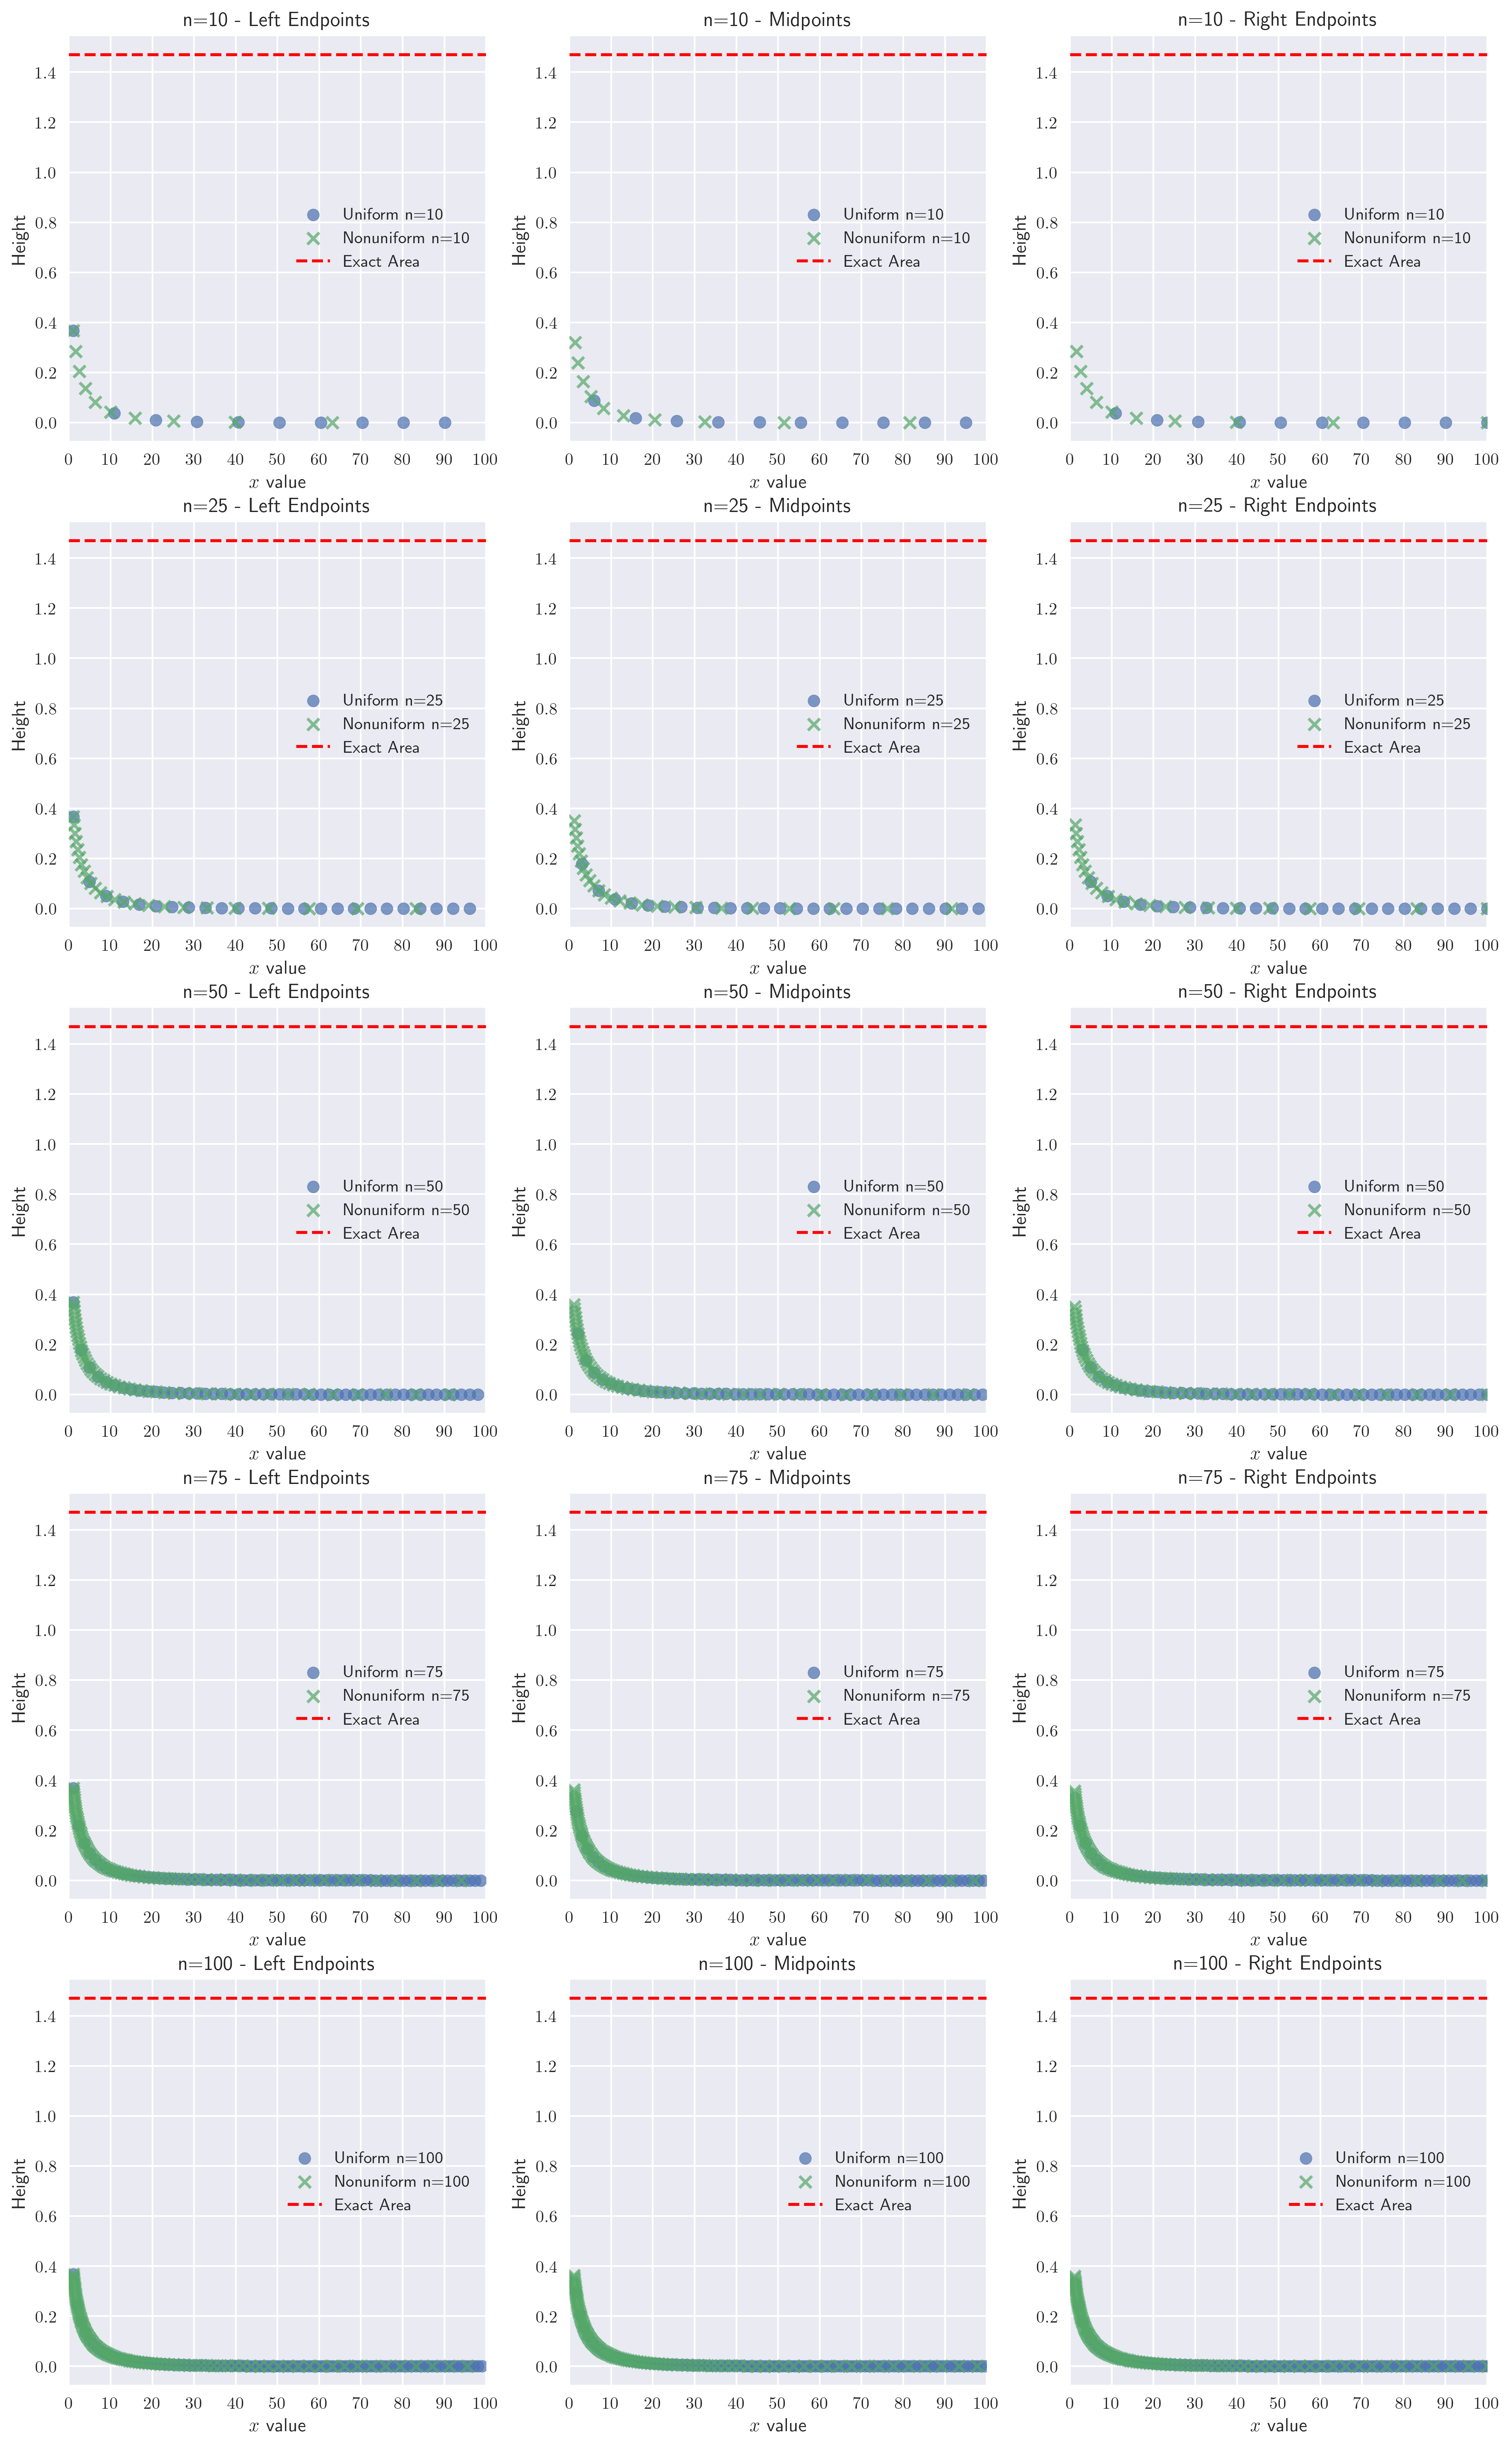

In [15]:
# Define main plot function
def plot_heights_sep(n_vals, exact_area, uniform_left, uniform_mid, uniform_right,
                nonuniform_left, nonuniform_mid, nonuniform_right):
    # Set figsize
    fig, axes = plt.subplots(len(n_vals), 3, figsize=(15, 25))
    
    # Plot subplots
    for row_idx, n in enumerate(n_vals):
        
        # Left subplot
        subplot_height(
            n=[n], pts='left', 
            ax=axes[row_idx, 0], 
            exact_area=exact_area,
            uniform_data=uniform_left,
            nonuniform_data=nonuniform_left
        )
        axes[row_idx, 0].set_title(f'n={n} - Left Endpoints')
        
        # Mid subplot
        subplot_height(
            n=[n], pts='mid',
            ax=axes[row_idx, 1],
            exact_area=exact_area,
            uniform_data=uniform_mid,
            nonuniform_data=nonuniform_mid
        )
        axes[row_idx, 1].set_title(f'n={n} - Midpoints')
        
        # Right subplot
        subplot_height(
            n=[n], pts='right',
            ax=axes[row_idx, 2],
            exact_area=exact_area,
            uniform_data=uniform_right,
            nonuniform_data=nonuniform_right
        )
        axes[row_idx, 2].set_title(f'n={n} - Right Endpoints')
    
    plt.show()

# Plot figure
plot_heights_sep(n_vals, result, 
             uniform_left, uniform_mid, uniform_right,
             nonuniform_left, nonuniform_mid, nonuniform_right)

## 3  Perpetuities

### Preps

* We know that:

$$
\begin{align}
S &= \sum_{k=0}^{\infty} ar^k =
\begin{cases} 
\frac{a}{1 - r} & \text{if } |r| < 1 \\ 
\text{DNE} & \text{if } |r| \geq 1 
\end{cases}\\
S &= \sum_{k=0}^{n} ar^k = \frac{a(1 - r^{n})}{1 - r}\\
\end{align}
$$

* $r = 0.065$
* Payment made at the end of each year
* $k = 0$ stands for Jan,2025

### (a) $10 Annuity

$$
\begin{align}
S &= \sum_{k=1}^{\infty} \frac{10}{(1+r)^k} \\
&= \sum_{k=0}^{\infty} \frac{10*\frac{1}{1+r}}{(1+r)^k} (|r| < 1)\\
&= \frac{\frac{10}{1+r}}{1 - \frac{1}{1+r}}\\
&= \frac{10}{1 + r - 1}\\
&= \frac{10}{r}\\
&= \frac{10}{0.065}\\
&= 153.846(\$)\\
\end{align}
$$

### (b) Payments of numerical value of the year

$$
\begin{align}
S &= \sum_{k=1}^{\infty} \frac{2024 + k}{(1+r)^k} \\
&= \sum_{k=1}^{\infty} \frac{2024}{(1+r)^k} + \sum_{k=1}^{\infty} \frac{k}{(1+r)^k} (|r| < 1)\\
&= \frac{2024}{r} + \sum_{k=1}^{\infty} \frac{k}{(1+r)^k}\\
\end{align}
$$

Let $x = \frac{1}{1+r}$,
$$
\begin{align}
\sum_{k=0}^{\infty} {x^k}  &= \frac{1}{1-x} \\
\frac{\,d}{\,dx}\sum_{k=0}^{\infty}x^k  &= \sum_{k=0}^{\infty}\frac{\,d}{\,dx}x^k \\
&= \sum_{k=1}^{\infty}kx^{k-1}\\
\frac{\,d}{\,dx}\frac{1}{1-x} &= \frac{0-(-1)}{(1-x)^2}\\
&= \frac{1}{(1-x)^2}\\
\sum_{k=1}^{\infty}kx^{k-1} &= \frac{1}{(1-x)^2}\\
\sum_{k=1}^{\infty}kx^k &= \frac{x}{(1-x)^2}\\
\sum_{k=1}^{\infty}\frac{k}{(1+r)^k} &= \frac{\frac{1}{1+r}}{\frac{r^2}{(1+r)^2}}\\
&= \frac{1+r}{r^2}\\
\end{align}
$$

$$
\begin{align}
S &= \frac{2024}{r} + \frac{1+r}{r^2}\\
&= \frac{2024}{0.065} + \frac{1.065}{0.065^2}\\
&= \frac{2024 \cdot 0.065 + 1.065}{0.065^2}\\
&= 31390.533(\$)
\end{align}
$$

### (c) Payment sequence of an increase of 10% for four years follows by an increase of 4% after that

$$
\begin{align}
S &= \sum_{k=1}^{5} \frac{(1+g_1)^{k-1}}{(1+r)^k} + \sum_{k=6}^{\infty} \frac{(1+g_1)^4\cdot(1+g_2)^{k-5}}{(1+r)^k} \\
&= \sum_{k=1}^{5} \frac{1.10^{k-1}}{(1.065)^k} + \sum_{k=6}^{\infty} \frac{1.10^4\cdot(1+g_2)^{k-5}}{(1.065)^5\cdot(1+r)^{k-5}} \\
&= \sum_{k=1}^{5} \frac{1.10^{k-1}}{(1.065)^k} + \frac{1.10^4}{(1.065)^5}\cdot\sum_{k=6}^{\infty} \left(\frac{1+g_2}{1+r}\right)^{k-5}(|r-g_2| < 1)\\
&= \sum_{k=1}^{5} \frac{1.10^{k-1}}{(1.065)^k} + \frac{1.10^4}{(1.065)^5}\cdot\frac{1.04}{r - g_2}\\
&= \sum_{k=1}^{5} \frac{1.10^{k-1}}{(1.065)^k} + \frac{1.10^4}{(1.065)^5}\cdot\frac{1.04}{0.025}\\
&= 49.468(\$)
\end{align}
$$

### (d) Payments of $\$\frac{k^k}{k!}$ in the k-th year, where 2025 corresponds to k = 1.

$$
\begin{align}
S &= \sum_{k=1}^{\infty} \frac{\frac{k^k}{k!}}{(1+r)^k} \\
\end{align}
$$

* This expression is very complicated
* We can conduct a ratio test at first to see if it converges

$$
\begin{align}
\lim_{k \to +\infty} \frac{\frac{\frac{(k + 1)^{k + 1}}{(k + 1)!}}{(1+r)^{k + 1}}}{\frac{\frac{k^k}{k!}}{(1+r)^k}}
&=\lim_{k \to +\infty} \frac{(k + 1)^{k + 1}}{k^k(k + 1)(1 + r)}\\
&=\lim_{k \to +\infty} \frac{(k + 1)^k}{k^k(1 + r)}\\
&=\frac{1}{(1 + r)} \lim_{k \to +\infty} \left(\frac{k + 1}{k}\right)^k\\
&=\frac{1}{(1 + r)} \lim_{k \to +\infty} \left(1 + \frac{1}{k}\right)^k\\
\end{align}
$$

* For an expression with the variable both under and on the exponent, we can simply find the log of the expression to solve the case

$$
\begin{align}
\ln{\lim_{k \to +\infty} \left(1 + \frac{1}{k}\right)^k} &= \lim_{k \to +\infty} k\ln{\left(1 + \frac{1}{k}\right)}\\
\end{align}
$$

* Let x = $\frac{1}{k}$

$$
\begin{align}
\lim_{k \to +\infty} k\ln{\left(1 + \frac{1}{k}\right)} &= \lim_{x \to 0^+} \frac{\ln{(1 + x)}}{x}\\
&= \lim_{x \to 0^+} \frac{\frac{1}{1 + x}}{1}\\
&= 1
\end{align}
$$

$$
\begin{align}
{\lim_{k \to +\infty} \left(1 + \frac{1}{k}\right)^k} &= e^{\ln{\lim_{k \to +\infty} \left(1 + \frac{1}{k}\right)^k}}\\
&= e^1\\
&= e\\
\end{align}
$$

$$
\begin{align}
\lim_{k \to +\infty} \frac{\frac{\frac{(k + 1)^{k + 1}}{(k + 1)!}}{(1+r)^{k + 1}}}{\frac{\frac{k^k}{k!}}{(1+r)^k}}
&=\frac{e}{1+r}\\
&\geq \frac{e}{2}\\
&\geq 1\\
\end{align}
$$

* The result would not converge